In [12]:
import warnings
warnings.filterwarnings('ignore')
import os; 


In [13]:
from pathlib import Path
from pandas.plotting import scatter_matrix
import hvplot.pandas

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [14]:
import yfinance as yf

symbol = "AME"

ticker = yf.Ticker(symbol)

data = ticker.history(period='5d',
                     interval='1m',
                     actions=True,
                     auto_adjust=True)

display(data.info())

# yfinance also provides access to the option expirarion dates and
# prices and other information for various contracts.
# Using ticker from the previos example we get the expiration dates using

display(ticker.options)

# For any of the dates, we access the option chain view details for various put/call contracts

#options = ticker.option_chain("2021-10-15",
                              #"2021-11-19")
    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1733 entries, 2021-11-05 09:30:00-04:00 to 2021-11-11 16:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1733 non-null   float64
 1   High          1733 non-null   float64
 2   Low           1733 non-null   float64
 3   Close         1733 non-null   float64
 4   Volume        1733 non-null   int64  
 5   Dividends     1733 non-null   int64  
 6   Stock Splits  1733 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 108.3 KB


None

('2021-11-19', '2021-12-17', '2022-03-18', '2022-06-17')

In [15]:
ratio_df = pd.read_csv('ratios_vals_money.csv',
                       infer_datetime_format=True,
                       index_col=['Ticker', 'Year'],
                       parse_dates=True,
                       delimiter=',')

display(ratio_df.head(15))

display(ratio_df.shape)

display(ratio_df.describe())

display(ratio_df.info())

display(ratio_df.value_counts())

ratio_df.drop(ratio_df.index[9], inplace=True)

display(ratio_df.head(15))


Close  Shares (Basic)  Shares (Diluted)   Revenue  Cost of Revenue  Gross Profit  Operating Expenses  Selling, General & Administrative  Research & Development  Depreciation & Amortization_x  Operating Income (Loss)  Non-Operating Income (Loss)  Interest Expense, Net  Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  Income (Loss) from Continuing Operations  Net Extraordinary Gains (Losses)  Net Income  Net Income (Common)  Cash, Cash Equivalents & Short Term Investments  Accounts & Notes Receivable  Inventories  Total Current Assets  Property, Plant & Equipment, Net  Long Term Investments & Receivables  Other Long Term Assets  Total Noncurrent Assets  Total Assets  Payables & Accruals  Short Term Debt  Total Current Liabilities  Long Term Debt  Total Noncurrent Liabilities  Total Liabilities  Share Capital & Additional Paid-In Capital  Treasury Stock  Retained Earnings  Total Equity  \
Ticker Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
A      2015-01-01  39.602        0.172274          0.168954 -0.106620         0.127958     -0.036993           -0.000036                          -0.066345               -0.208035                       0.179789                -0.085018                     0.059474               0.155789                   -0.071408                 0.102475             -0.047871                           0.118054                                 -0.016521                         -0.157372   -0.030874            -0.029651                                         0.155972                    -0.043646     0.006434              0.055896                         -0.207525                            -0.073306               -0.023020                -0.130092     -0.076172            -0.187889        -0.171002                  -0.152952       -0.122725                     -0.125281          -0.147966                                    0.928680       -1.075697           0.209957      0.051456   
       2016-01-01  43.370        0.162817          0.160931 -0.099310         0.127476     -0.015615           -0.013266                          -0.084542               -0.206883                       0.179789                -0.055833                     0.031520               0.149547                   -0.049564                 0.102475             -0.026186                           0.072776                                 -0.006239                         -0.030193   -0.004714            -0.003491                                         0.205335                    -0.037257     0.002733              0.051442                         -0.204437                            -0.065501               -0.001508                -0.114804     -0.066475            -0.192370        -0.171002                  -0.156650       -0.093715                     -0.107180          -0.136744                                    0.944572       -1.128644           0.243927      0.057234   
       2017-01-01  59.330        0.157412          0.156919 -0.087275         0.123979      0.013437

(9080, 82)

,Close,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization_x,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Net Income/Starting Line,Depreciation & Amortization_y,Non-Cash Items,Change in Working Capital,Change in Accounts Receivable,Change in Inventories,Change in Accounts Payable,Change in Other,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,book_value_per_share_ratio,divid_yield_ratio,Earnings_per_share_ratio,price_earnings_ratio,gross_margin_ratios,operating_margin_ratio,ret_on_asser_ratio,return_onEquity_ratio,ave_tot_assets,av_inven,average_accts_receivable,asset_turnover,inventoty_turnover,days_sales_in_inven,receivables_turnover_ratio,debt_ratio,debt_to_equ,Interest_coverage_ratio,debt_service_cov_ratio,Asets/Liabili,acid_test,cash_ratio,op_cash_flow_ratio
count,9.078000e+03,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9.078000e+03,9080.000000,9080.000000,9080.000000,9080.000000,9.080000e+03,9.080000e+03,9.080000e+03,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000,9080.000000
mean,1.041368e+04,0.005111,0.004968,0.011596,-0.008248,0.016921,-0.019979,-0.012878,-0.018541,-0.012193,0.008818,-0.005580,-0.017043,0.007615,-0.014104,0.004392,0.010315,0.009420,-0.006286,0.009494,0.009719,0.011292,-0.004159,0.011222,0.008561,0.015419,0.005080,0.026394,0.023085,0.020031,0.016583,0.015039,0.018396,0.025347,0.019599,0.020970,0.025978,-0.017566,0.014138,0.015521,0.020031,0.008959,0.019256,0.003252,0.005658,-0.008161,-0.001567,0.009412,0.008948,0.015925,-0.002344,-0.000335,-0.009730,-0.012293,-0.024055,0.006023,-0.012349,-0.007679,0.000282,0.278356,-0.403164,0.086464,1.337869e+04,1.385251,1.074003,10.908034,-14.159093,8.561031e-03,1.122247e-02,-4.158779e-03,1.109037,-0.734954,-7.851041,1.846336,7.767920,-24.921885,-0.454938,-0.439899,-0.100086,0.641108,-0.512343,-2.819513
std,8.687255e+05,0.982669,0.982450,1.028787,1.028139,1.039490,1.063712,1.044739,1.100991,1.076289,0.992268,0.973942,1.056649,1.035324,1.100189,1.036022,1.021330,1.067799,0.995520,1.068525,1.068612,1.067279,0.713766,1.051085,0.987591,1.041997,1.077960,1.062252,1.064310,1.046573,1.053231,0.994982,1.038476,1.020638,1

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9080 entries, ('A', Timestamp('2015-01-01 00:00:00')) to ('ZYXI', Timestamp('2019-01-01 00:00:00'))
Data columns (total 82 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Close                                            9078 non-null   float64
 1   Shares (Basic)                                   9080 non-null   float64
 2   Shares (Diluted)                                 9080 non-null   float64
 3   Revenue                                          9080 non-null   float64
 4   Cost of Revenue                                  9080 non-null   float64
 5   Gross Profit                                     9080 non-null   float64
 6   Operating Expenses                               9080 non-null   float64
 7   Selling, General & Administrative                9080 non-null   float64
 8   Research & Development          

None

Close         Shares (Basic)  Shares (Diluted)  Revenue    Cost of Revenue  Gross Profit  Operating Expenses  Selling, General & Administrative  Research & Development  Depreciation & Amortization_x  Operating Income (Loss)  Non-Operating Income (Loss)  Interest Expense, Net  Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  Income (Loss) from Continuing Operations  Net Extraordinary Gains (Losses)  Net Income  Net Income (Common)  Cash, Cash Equivalents & Short Term Investments  Accounts & Notes Receivable  Inventories  Total Current Assets  Property, Plant & Equipment, Net  Long Term Investments & Receivables  Other Long Term Assets  Total Noncurrent Assets  Total Assets  Payables & Accruals  Short Term Debt  Total Current Liabilities  Long Term Debt  Total Noncurrent Liabilities  Total Liabilities  Share Capital & Additional Paid-In Capital  Treasury Stock  Retained Earnings  Total Equity  Total Liabilities & Equity  Net In

Close  Shares (Basic)  Shares (Diluted)   Revenue  Cost of Revenue  Gross Profit  Operating Expenses  Selling, General & Administrative  Research & Development  Depreciation & Amortization_x  Operating Income (Loss)  Non-Operating Income (Loss)  Interest Expense, Net  Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  Income (Loss) from Continuing Operations  Net Extraordinary Gains (Losses)  Net Income  Net Income (Common)  Cash, Cash Equivalents & Short Term Investments  Accounts & Notes Receivable  Inventories  Total Current Assets  Property, Plant & Equipment, Net  Long Term Investments & Receivables  Other Long Term Assets  Total Noncurrent Assets  Total Assets  Payables & Accruals  Short Term Debt  Total Current Liabilities  Long Term Debt  Total Noncurrent Liabilities  Total Liabilities  Share Capital & Additional Paid-In Capital  Treasury Stock  Retained Earnings  Total Equity  \
Ticker Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
A      2015-01-01   39.602        0.172274          0.168954 -0.106620         0.127958     -0.036993           -0.000036                          -0.066345               -0.208035                       0.179789                -0.085018                     0.059474               0.155789                   -0.071408                 0.102475             -0.047871                           0.118054                                 -0.016521                         -0.157372   -0.030874            -0.029651                                         0.155972                    -0.043646     0.006434              0.055896                         -0.207525                            -0.073306               -0.023020                -0.130092     -0.076172            -0.187889        -0.171002                  -0.152952       -0.122725                     -0.125281          -0.147966                                    0.928680       -1.075697           0.209957      0.051456   
       2016-01-01   43.370        0.162817          0.160931 -0.099310         0.127476     -0.015615           -0.013266                          -0.084542               -0.206883                       0.179789                -0.055833                     0.031520               0.149547                   -0.049564                 0.102475             -0.026186                           0.072776                                 -0.006239                         -0.030193   -0.004714            -0.003491                                         0.205335                    -0.037257     0.002733              0.051442                         -0.204437                            -0.065501               -0.001508                -0.114804     -0.066475            -0.192370        -0.171002                  -0.156650       -0.093715                     -0.107180          -0.136744                                    0.944572       -1.128644           0.243927      0.057234   
       2017-01-01   59.330        0.157412          0.156919 -0.087275         0.123979      0.01

In [16]:
import quandl

oil = quandl.get('EIA/PET_RWTC_D').squeeze()

oil.hvplot(lw=2, title='WTI Crude Oil Price')

:Curve   [Date]   (Value)

In [32]:
# Use Quandl to obtain Apple stock price data since 2009:

import pandas_datareader.data as web 

#sybol = 'AAPL.US'

#aapl_stock = web.DataReader(symbol, 'quandl', start=eps)

eps = ratio_df[['Earnings_per_share_ratio']]

pe = ratio_df[['price_earnings_ratio']]

pe_aapl = pe.loc['AAPL']

eps_aapl = eps.loc['AAPL']

display(eps)

display(pe)

Earnings_per_share_ratio
Ticker Year                                
A      2015-01-01                 -0.179214
       2016-01-01                 -0.028951
       2017-01-01                  0.574877
       2018-01-01                 -0.431414
       2019-01-01                  1.749350
...                                     ...
ZYXI   2015-01-01                  0.867034
       2016-01-01                  0.861604
       2017-01-01                  0.852642
       2018-01-01                  0.850340
       2019-01-01                  0.850135

[9079 rows x 1 columns]

price_earnings_ratio
Ticker Year                            
A      2015-01-01           -220.975469
       2016-01-01          -1498.033736
       2017-01-01            103.204712
       2018-01-01           -155.694957
       2019-01-01             42.994261
...                                 ...
ZYXI   2015-01-01              0.223751
       2016-01-01              0.342384
       2017-01-01              1.310046
       2018-01-01              3.979587
       2019-01-01              8.873883

[9079 rows x 1 columns]

In [33]:
ratio_df

Close  Shares (Basic)  Shares (Diluted)   Revenue  Cost of Revenue  Gross Profit  Operating Expenses  Selling, General & Administrative  Research & Development  Depreciation & Amortization_x  Operating Income (Loss)  Non-Operating Income (Loss)  Interest Expense, Net  Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  Income (Loss) from Continuing Operations  Net Extraordinary Gains (Losses)  Net Income  Net Income (Common)  Cash, Cash Equivalents & Short Term Investments  Accounts & Notes Receivable  Inventories  Total Current Assets  Property, Plant & Equipment, Net  Long Term Investments & Receivables  Other Long Term Assets  Total Noncurrent Assets  Total Assets  Payables & Accruals  Short Term Debt  Total Current Liabilities  Long Term Debt  Total Noncurrent Liabilities  Total Liabilities  Share Capital & Additional Paid-In Capital  Treasury Stock  Retained Earnings  Total Equity  \
Ticker Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
A      2015-01-01  39.602        0.172274          0.168954 -0.106620         0.127958     -0.036993           -0.000036                          -0.066345               -0.208035                       0.179789                -0.085018                     0.059474               0.155789                   -0.071408                 0.102475             -0.047871                           0.118054                                 -0.016521                         -0.157372   -0.030874            -0.029651                                         0.155972                    -0.043646     0.006434              0.055896                         -0.207525                            -0.073306               -0.023020                -0.130092     -0.076172            -0.187889        -0.171002                  -0.152952       -0.122725                     -0.125281          -0.147966                                    0.928680       -1.075697           0.209957      0.051456   
       2016-01-01  43.370        0.162817          0.160931 -0.099310         0.127476     -0.015615           -0.013266                          -0.084542               -0.206883                       0.179789                -0.055833                     0.031520               0.149547                   -0.049564                 0.102475             -0.026186                           0.072776                                 -0.006239                         -0.030193   -0.004714            -0.003491                                         0.205335                    -0.037257     0.002733              0.051442                         -0.204437                            -0.065501               -0.001508                -0.114804     -0.066475            -0.192370        -0.171002                  -0.156650       -0.093715                     -0.107180          -0.136744                                    0.944572       -1.128644           0.243927      0.057234   
       2017-01-01  59.330        0.157412          0.156919 -0.087275         0.123979      0.013437

In [41]:
pe_aapl = ratio_df.Close.combine(eps[])

pe_aapl = pe_aapl.fillna(method='ffill').dropna()

pe_aapl['P/E Ratio'] = pe_aapl.Price.div(pe_aapl.eps)

SyntaxError: invalid syntax (Temp/ipykernel_54400/1082259132.py, line 1)

In [8]:
pe_aapl_ = pe_aapl

In [9]:
pe_aapl_['P/E Ratio'] = pe_aapl['P/E Ratio'].copy() / 10

In [60]:
pe_aapl_.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9079 entries, ('A', Timestamp('2015-01-01 00:00:00')) to ('ZYXI', Timestamp('2019-01-01 00:00:00'))
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      9079 non-null   float64
 1   eps        9079 non-null   float64
 2   P/E Ratio  9079 non-null   float64
dtypes: float64(3)
memory usage: 320.5+ KB


In [54]:
axes = pe.loc[['CNK', 'AME']].hvplot(kind='bar',subplots=True, figsize=(25,12), legend=False)

axes

:NdLayout   [Year]
   :Bars   [Ticker]   (price_earnings_ratio)

In [56]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1, 2, 3, 6, 9, 12]
for lag in lags:
    data[f'return_{lag}m'] = (pe_aapl_
                           .pct_change(lag)
                           .stack()
                           .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                  upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1)
                           )
data = data.swaplevel().dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18471 entries, ('AAL', 'Price', Timestamp('2018-01-01 00:00:00')) to ('ZYXI', 'P/E Ratio', Timestamp('2019-01-01 00:00:00'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1m   18471 non-null  float64
 1   return_2m   18471 non-null  float64
 2   return_3m   18471 non-null  float64
 3   return_6m   18471 non-null  float64
 4   return_9m   18471 non-null  float64
 5   return_12m  18471 non-null  float64
dtypes: float64(6)
memory usage: 1019.3+ KB


In [66]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  return_12m
Ticker           Year                                                                         
AAL    Price     2018-01-01   0.255726   0.344363   0.163461   0.038682   0.000000    0.038575
                 2019-01-01   0.101581   0.176130   0.258007   0.016255   0.000000    0.059060
AAMC   Price     2015-01-01  -0.423594  -0.203158  -0.072715  -0.087734   0.015411   -0.018697
       eps       2015-01-01  -0.540570  -0.196527  -0.228275  -0.442430  -0.267962    0.021683
       P/E Ratio 2015-01-01   0.254612  -0.008252   0.201574   0.636145   0.387102   -0.039523
...                                ...        ...        ...        ...        ...         ...
ZYXI   eps       2018-01-01  -0.002700  -0.006559  -0.006460   0.003569  -0.083911    0.006871
       P/E Ratio 2018-01-01   0.259126   0.353238   0.171025   0.034987   0.079926    0.012203
       Price     2019-01-01   0.101581   0.176130   0.258007   0.016255   0.063128    0.008095
       eps       2019-01-01  -0.000240  -0.001471  -0.004457  -0.001148   0.011557    0.010271
       P/E Ratio 2019-01-01   0.101845   0.177863   0.263639   0.017423   0.050983   -0.002154

[18471 rows x 6 columns]

In [78]:
data.index.name = 'ticker'

In [ ]:
min_obs = 12
nobs = data.groupby(level='Ticker').size()

In [102]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  return_12m
Ticker           Year                                                                         
AAL    Price     2018-01-01   0.255726   0.344363   0.163461   0.038682   0.000000    0.038575
                 2019-01-01   0.101581   0.176130   0.258007   0.016255   0.000000    0.059060
AAMC   Price     2015-01-01  -0.423594  -0.203158  -0.072715  -0.087734   0.015411   -0.018697
       eps       2015-01-01  -0.540570  -0.196527  -0.228275  -0.442430  -0.267962    0.021683
       P/E Ratio 2015-01-01   0.254612  -0.008252   0.201574   0.636145   0.387102   -0.039523
...                                ...        ...        ...        ...        ...         ...
ZYXI   eps       2018-01-01  -0.002700  -0.006559  -0.006460   0.003569  -0.083911    0.006871
       P/E Ratio 2018-01-01   0.259126   0.353238   0.171025   0.034987   0.079926    0.012203
       Price     2019-01-01   0.101581   0.176130   0.258007   0.016255   0.063128    0.008095
       eps       2019-01-01  -0.000240  -0.001471  -0.004457  -0.001148   0.011557    0.010271
       P/E Ratio 2019-01-01   0.101845   0.177863   0.263639   0.017423   0.050983   -0.002154

[18471 rows x 6 columns]

In [100]:
keep = nobs[nobs>min_obs]

In [ ]:
data_full = data.loc[['AAMC', 'AAOI', 'AAON', 'AAXN', 'ABBV', 'ABG', 'ABM', 'ABMC',
       'ABT', 'ABTL', 'AC', 'ACAD', 'ACGL', 'ACHC', 'ACIW', 'ACLS', 'ACM',
       'ACN', 'ACRX', 'ACY', 'ADBE', 'ADES', 'ADI', 'ADM', 'ADMA', 'AEE',
       'AEHR', 'AEIS', 'AEO', 'AEP', 'AGIO', 'AHPI', 'AIMC', 'AIR',
       'AIRI', 'AIT', 'AKRX', 'ALG', 'ALGN', 'ALGT', 'ALJJ', 'ALNY',
       'ALOT', 'ALPN', 'ALRM', 'ALSK', 'ALX', 'AMC', 'AMCX', 'AMT',
       'AMTD', 'AMWD', 'AMZN', 'AN', 'ANDE', 'AON', 'APPF', 'APTV',
       'ARAY', 'ARCB', 'ARCI', 'ARE', 'ARNA', 'ASGN', 'ASPN', 'ASPU',
       'ASTC', 'ASYS', 'ATI', 'ATU', 'AVAV', 'AVNW', 'AWI', 'AXL', 'BAX',
       'BC', 'BCO', 'BCPC', 'BFB', 'BHE', 'BKH', 'BKI', 'BLD', 'BLDR',
       'BLFS', 'BMRA', 'BMRN', 'BMY', 'BNED', 'BNFT', 'BOOM', 'BOX',
       'BPI', 'BSTC', 'BX', 'BXC', 'CABO', 'CALA', 'CALM', 'CAR', 'CASI',
       'CASY', 'CATO', 'CBB', 'CBOE', 'CBRL', 'CCOI', 'CCS', 'CCXI',
       'CDE', 'CERN', 'CETX', 'CGA', 'CGNX', 'CHEF', 'CHGG', 'CHH',
       'CHRS', 'CLAR', 'CLCT', 'CLH', 'CLNE', 'CMD', 'CME', 'CODI',
       'CONN', 'COO', 'COST', 'COT', 'CREE', 'CRI', 'CRIS', 'CRL', 'CRS',
       'CRTO', 'CRWS', 'CRY', 'CSBR', 'CSCO', 'CSGS', 'CSII', 'CSL',
       'CSOD', 'CSU', 'CSX', 'CUZ', 'CVGI', 'CVS', 'DDD', 'DE', 'DECK',
       'DEI', 'DENN', 'DF', 'DIS', 'DKS', 'DLB', 'DLTH', 'DMRC', 'DNKN',
       'DNOW', 'DSW', 'DXPE', 'DY', 'DYNT', 'EAT', 'EBIX', 'EBS', 'EE',
       'EEI', 'EFOI', 'EFR', 'EGLT', 'EGP', 'EGY', 'EHTH', 'EIGI', 'EIX',
       'EME', 'ENV', 'ENVA', 'ENZ', 'ESP', 'ESS', 'ETN', 'EVC', 'EVH',
       'EVR', 'EVRI', 'EVTC', 'EW', 'EXAS', 'FAST', 'FB', 'FBHS', 'FC',
       'FCEL', 'FCFS', 'FCN', 'FCPT', 'FEIM', 'FELE', 'FET', 'FEYE',
       'FGEN', 'FGP', 'FICO', 'FII', 'FIS', 'FIZZ', 'FKWL', 'FOE', 'FOLD',
       'FORD', 'FORM', 'FORR', 'FOSL', 'FOXF', 'FPRX', 'FRAN', 'FRGI',
       'FRPT', 'FRT', 'FTEK', 'FUL', 'GBX', 'GD', 'GDDY', 'GDOT', 'GEOS',
       'GERN', 'GFF', 'GGG', 'GHC', 'GIDYL', 'GIII', 'GILD', 'GIS',
       'GLGI', 'GLP', 'GNRC', 'GRA', 'GRC', 'GWGH', 'HCHC', 'HEI', 'HIBB',
       'HMHC', 'HNI', 'HNNA', 'HNRG', 'HOFT', 'HQY', 'HRL', 'HSY', 'HTGM',
       'HTLD', 'HTZ', 'HUBB', 'HUBS', 'HXL', 'HZO', 'ICE', 'ICPT', 'ICUI',
       'IDA', 'IDCC', 'IDT', 'IDXX', 'IHT', 'IIN', 'INT', 'INTC', 'INTT',
       'IO', 'IONS', 'IOTS', 'IP', 'IPAR', 'IPDN', 'IPHI', 'IPI', 'IRBT',
       'IRDM', 'ITRI', 'ITT', 'ITW', 'IVAC', 'IVDN', 'IVZ', 'JACK',
       'JAGX', 'JAKK', 'JKHY', 'JSDA', 'JVA', 'KANP', 'KEX', 'KOOL',
       'KOPN', 'KRO', 'KURA', 'KWR', 'LAD', 'LAKE', 'LAMR', 'LANC',
       'LCUT', 'LEG', 'LFUS', 'LGIH', 'LGL', 'LIVE', 'LLNW', 'LMT',
       'LOGM', 'LOPE', 'LPLA', 'LQDT', 'LTRPA', 'LTRX', 'MARK', 'MC',
       'MCD', 'MCFT', 'MDP', 'MDR', 'MDRX', 'MDT', 'MDU', 'MED', 'MEET',
       'MEI', 'MEIP', 'MELI', 'MFON', 'MGEE', 'MGLN', 'MGPI', 'MHH',
       'MIDD', 'MITK', 'MLHR', 'MMMB', 'MNST', 'MNTM', 'MO', 'MPX', 'MRC',
       'MRCY', 'MRK', 'MTRN', 'MTSI', 'MTZ', 'NATI', 'NATR', 'NAV',
       'NBIX', 'NEOS', 'NEP', 'NERV', 'NEU', 'NHTC', 'NKE', 'NKTR', 'NLS',
       'NSSC', 'NTRA', 'NUVA', 'NVAX', 'NVCR', 'NVDA', 'OCN', 'OGE',
       'OGS', 'OHI', 'OMI', 'OPHT', 'OPRX', 'OPTT', 'ORCL', 'PAYC',
       'PAYS', 'PAYX', 'PBI', 'PBYI', 'PCTI', 'PCTY', 'PDCO', 'PDEX',
       'PDFS', 'PDLI', 'PEB', 'PEGA', 'PEN', 'PEP', 'PESI', 'PFE', 'PFGC',
       'PFPT', 'PG', 'PGNX', 'PII', 'PINC', 'PLAY', 'PLCE', 'PLD', 'PLNT',
       'PLPC', 'PM', 'PMD', 'PNM', 'PPL', 'PPSI', 'PRAH', 'PRCP', 'PRGS',
       'PRKA', 'PRLB', 'PTEN', 'QCOM', 'QDEL', 'QSR', 'QUOT', 'RCII',
       'RCL', 'RDNT', 'RFIL', 'RFP', 'RGEN', 'RGLD', 'RGLS', 'RGS', 'RHI',
       'RICK', 'RLGY', 'RMD', 'RNG', 'ROCK', 'ROG', 'ROIA', 'RST', 'RTN',
       'RUN', 'RUSHA', 'RUTH', 'RWLK', 'RYAM', 'RYN', 'SAIA', 'SAIC',
       'SAM', 'SANM', 'SANW', 'SAVA', 'SAVE', 'SBAC', 'SCSC', 'SCSS',
       'SDON', 'SEAS', 'SEB', 'SEDG', 'SFM', 'SGA', 'SGEN', 'SGMA',
       'SGMO', 'SGMS', 'SHAK', 'SHEN', 'SHLO', 'SIRI', 'SIX', 'SLGN',
       'SMG', 'SMIT', 'SMLP', 'SMP', 'SMRT', 'SMSI', 'SMTC', 'SOHO',
       'SON', 'SORL', 'SPG', 'SPH', 'SPLK', 'SPPI', 'SPRT', 'SPXC',
       'SRRA', 'SRT', 'SSD', 'SSTK', 'ST', 'STAY', 'STMP', 'STOR', 'STRT',
       'SVT', 'SYK', 'T', 'TA', 'TAP', 'TBI', 'TBTC', 'TCX', 'TDC',
       'TECH', 'TEL', 'TEN', 'THS', 'TJX', 'TKR', 'TMO', 'TMUS', 'TNDM',
       'TNET', 'TREX', 'TROW', 'TROX', 'TRT', 'TRUE', 'TRUP', 'TTEK',
       'TTGT', 'TTMI', 'TTOO', 'TTPH', 'TU', 'TUES', 'TUP', 'TVTY', 'TWI',
       'TWIN', 'TWMC', 'TWOU', 'TZOO', 'UNH', 'UNP', 'UPLD', 'UPS',
       'URBN', 'UTX', 'V', 'VAC', 'VALU', 'VEEV', 'VERU', 'VFC', 'VGR',
       'VIA', 'VIRC', 'VISI', 'VKTX', 'VLGEA', 'VNO', 'VRNS', 'VRNT',
       'VSTM', 'VZ', 'W', 'WAB', 'WCC', 'WING', 'WIRE', 'WK', 'WMT',
       'WNC', 'WNDW', 'WOR', 'WTR', 'WWW', 'WY', 'XNCR', 'XOM', 'XONE',
       'XPER', 'XPO', 'ZG', 'ZYNE', 'ZYXI']]

In [118]:
data_full

return_1m  return_2m  return_3m  return_6m  return_9m  return_12m
Ticker           Year                                                                         
AAMC   Price     2015-01-01  -0.423594  -0.203158  -0.072715  -0.087734   0.015411   -0.018697
       eps       2015-01-01  -0.540570  -0.196527  -0.228275  -0.442430  -0.267962    0.021683
       P/E Ratio 2015-01-01   0.254612  -0.008252   0.201574   0.636145   0.387102   -0.039523
       Price     2016-01-01  -0.128590  -0.291279  -0.179039  -0.022679  -0.039651   -0.048124
                 2017-01-01   0.439257   0.119903  -0.102510   0.062567  -0.024984   -0.026676
...                                ...        ...        ...        ...        ...         ...
ZYXI   eps       2018-01-01  -0.002700  -0.006559  -0.006460   0.003569  -0.083911    0.006871
       P/E Ratio 2018-01-01   0.259126   0.353238   0.171025   0.034987   0.079926    0.012203
       Price     2019-01-01   0.101581   0.176130   0.258007   0.016255   0.063128    0.008095
       eps       2019-01-01  -0.000240  -0.001471  -0.004457  -0.001148   0.011557    0.010271
       P/E Ratio 2019-01-01   0.101845   0.177863   0.263639   0.017423   0.050983   -0.002154

[8549 rows x 6 columns]

In [119]:
import seaborn as sns 

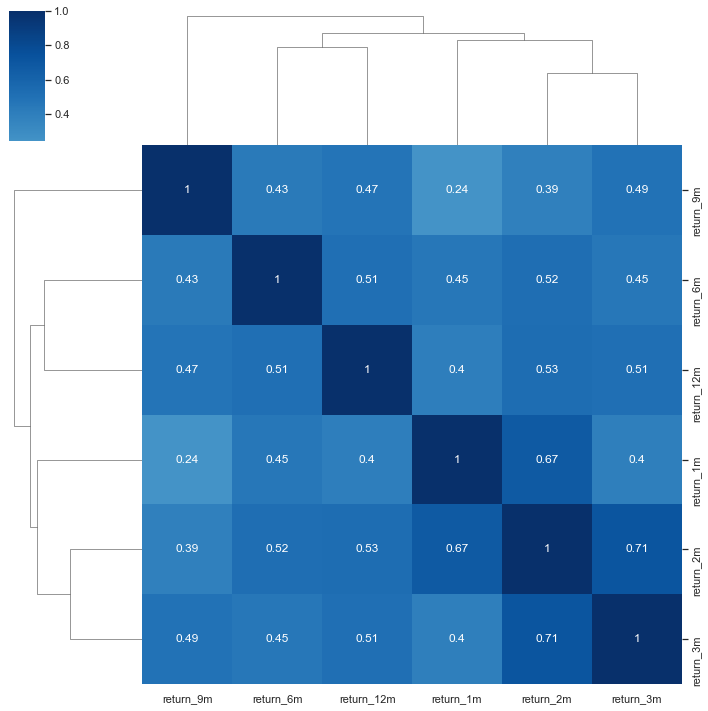

In [123]:
sns.clustermap(data_full.corr('spearman'), annot=True, center=0, cmap='Blues');

## 

In [136]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2000')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'Year'
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2000-01-31 to 2021-09-30
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  261 non-null    float64
 1   SMB     261 non-null    float64
 2   HML     261 non-null    float64
 3   RMW     261 non-null    float64
 4   CMA     261 non-null    float64
dtypes: float64(5)
memory usage: 12.2 KB


In [138]:
for lag in [2,3,6,9,12]:
    data_full[f'momentum_{lag}'] = data_full[f'return_{lag}m'].sub(data_full.return_1m)
data_full[f'momentum_3_12'] = data_full[f'return_12m'].sub(data_full.return_3m)

In [141]:
dates = data_full.index.get_level_values('Year')
data_full['year'] = dates.year
data_full['month'] = dates.month

In [144]:
for t in range(1, 7):
    data_full[f'return_1m_t-{t}'] = data_full.groupby(level='Ticker').return_1m.shift(t)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8549 entries, ('AAMC', 'Price', Timestamp('2015-01-01 00:00:00')) to ('ZYXI', 'P/E Ratio', Timestamp('2019-01-01 00:00:00'))
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   return_1m      8549 non-null   float64
 1   return_2m      8549 non-null   float64
 2   return_3m      8549 non-null   float64
 3   return_6m      8549 non-null   float64
 4   return_9m      8549 non-null   float64
 5   return_12m     8549 non-null   float64
 6   momentum_2     8549 non-null   float64
 7   momentum_3     8549 non-null   float64
 8   momentum_6     8549 non-null   float64
 9   momentum_9     8549 non-null   float64
 10  momentum_12    8549 non-null   float64
 11  momentum_3_12  8549 non-null   float64
 12  year           8549 non-null   int64  
 13  month          8549 non-null   int64  
 14  return_1m_t-1  7966 non-null   float64
 15  return_1m_t-2  7383 non-null   float64


In [145]:
data_full

return_1m  return_2m  return_3m  return_6m  return_9m  return_12m  momentum_2  momentum_3  momentum_6  momentum_9  momentum_12  momentum_3_12  year  month  return_1m_t-1  return_1m_t-2  return_1m_t-3  return_1m_t-4  return_1m_t-5  return_1m_t-6
Ticker           Year                                                                                                                                                                                                                                                            
AAMC   Price     2015-01-01  -0.423594  -0.203158  -0.072715  -0.087734   0.015411   -0.018697    0.220436    0.350879    0.335860    0.439005     0.404897       0.054019  2015      1            NaN            NaN            NaN            NaN            NaN            NaN
       eps       2015-01-01  -0.540570  -0.196527  -0.228275  -0.442430  -0.267962    0.021683    0.344043    0.312295    0.098141    0.272608     0.562253       0.249958  2015      1      -0.423594            NaN            NaN            NaN            NaN            NaN
       P/E Ratio 2015-01-01   0.254612  -0.008252   0.201574   0.636145   0.387102   -0.039523   -0.262864   -0.053038    0.381533    0.132490    -0.294135      -0.241097  2015      1      -0.540570      -0.423594            NaN            NaN            NaN            NaN
       Price     2016-01-01  -0.128590  -0.291279  -0.179039  -0.022679  -0.039651   -0.048124   -0.162688   -0.050449    0.105911    0.088939     0.080467       0.130916  2016      1       0.254612      -0.540570      -0.423594            NaN            NaN            NaN
                 2017-01-01   0.439257   0.119903  -0.102510   0.062567  -0.024984   -0.026676   -0.319354   -0.541767   -0.376690   -0.464241    -0.465933       0.075834  2017      1      -0.128590       0.254612      -0.540570      -0.423594            NaN            NaN
...                                ...        ...        ...        ...        ...         ...         ...         ...         ...         ...          ...            ...   ...    ...            ...            ...            ...            ...            ...            ...
ZYXI   eps       2018-01-01  -0.002700  -0.006559  -0.006460   0.003569  -0.083911    0.006871   -0.003858   -0.003759    0.006270   -0.081211     0.009571       0.013330  2018      1       0.255726       0.454385      -0.010402       0.439257      -0.123100      -0.006262
       P/E Ratio 2018-01-01   0.259126   0.353238   0.171025   0.034987   0.079926    0.012203    0.094112   -0.088100   -0.224138   -0.179200    -0.246923      -0.158823  2018      1      -0.002700       0.255726       0.454385      -0.010402       0.439257      -0.123100
       Price     2019-01-01   0.101581   0.176130   0.258007   0.016255   0.063128    0.008095    0.074550    0.156427   -0.085325   -0.038452    -0.093486      -0.249912  2019      1       0.259126      -0.002700       0.255726       0.454385      -0.010402       0.439257
       eps       2019-01-01  -0.000240  -0.001471  -0.004457  -0.001148   0.011557    0.010271   -0.001231   -0.004217   -0.000908    0.011797     0.010511       0.014728  2019      1       0.101581       0.259126      -0.002700       0.255726       0.454385      -0.010402
       P/E Ratio 2019-01-01   0.101845   0.177863   0.263639   0.017423   0.050983   -0.002154    0.076018    0.161794   -0.084422   -0.050863    -0.104000      -0.265793  2019      1      -0.000240       0.101581       0.259126      -0.002700       0.255726       0.454385

[8549 rows x 20 columns]

In [147]:
for t in [1,2,3,6,12]:
    data_full[f'target_{t}m'] = data_full.groupby(level='Ticker')[f'return_{t}m'].shift(-t)

In [150]:
cols = ['target_1m',
        'target_2m',
        'target_3m', 
        'return_1m',
        'return_2m',
        'return_3m',
        'return_1m_t-1',
        'return_1m_t-2',
        'return_1m_t-3']

data_full[cols].dropna().sort_index()

target_1m  target_2m  target_3m  return_1m  return_2m  return_3m  return_1m_t-1  return_1m_t-2  return_1m_t-3
Ticker           Year                                                                                                                     
AAMC   P/E Ratio 2017-01-01   0.255726   0.005849   0.158470   0.434437   0.117336   0.161339       0.003360       0.439257      -0.128590
                 2018-01-01   0.101581  -0.004501   0.260386   0.245336   0.336546   0.158470       0.008343       0.255726       0.434437
       Price     2016-01-01   0.439257   0.002297   0.161339  -0.128590  -0.291279  -0.179039       0.254612      -0.540570      -0.423594
                 2017-01-01   0.003360   0.117336   0.163461   0.439257   0.119903  -0.102510      -0.128590       0.254612      -0.540570
                 2018-01-01   0.008343   0.336546   0.258007   0.255726   0.344363   0.163461       0.434437       0.003360       0.439257
...                                ...        ...        ...        ...        ...        ...            ...            ...            ...
ZYXI   Price     2017-01-01  -0.010402   0.129314   0.163461   0.439257   0.119903  -0.102510      -0.123100      -0.006262      -0.128590
                 2018-01-01  -0.002700   0.353238   0.258007   0.255726   0.344363   0.163461       0.454385      -0.010402       0.439257
       eps       2016-01-01  -0.123100   0.119903  -0.008658  -0.006262  -0.007785   0.002172      -0.128590      -0.418180      -0.009306
                 2017-01-01   0.454385   0.344363  -0.006460  -0.010402  -0.008334  -0.008658       0.439257      -0.123100      -0.006262
                 2018-01-01   0.259126   0.176130  -0.004457  -0.002700  -0.006559  -0.006460       0.255726       0.454385      -0.010402

[5051 rows x 9 columns]

In [152]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8549 entries, ('AAMC', 'Price', Timestamp('2015-01-01 00:00:00')) to ('ZYXI', 'P/E Ratio', Timestamp('2019-01-01 00:00:00'))
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   return_1m      8549 non-null   float64
 1   return_2m      8549 non-null   float64
 2   return_3m      8549 non-null   float64
 3   return_6m      8549 non-null   float64
 4   return_9m      8549 non-null   float64
 5   return_12m     8549 non-null   float64
 6   momentum_2     8549 non-null   float64
 7   momentum_3     8549 non-null   float64
 8   momentum_6     8549 non-null   float64
 9   momentum_9     8549 non-null   float64
 10  momentum_12    8549 non-null   float64
 11  momentum_3_12  8549 non-null   float64
 12  year           8549 non-null   int64  
 13  month          8549 non-null   int64  
 14  return_1m_t-1  7966 non-null   float64
 15  return_1m_t-2  7383 non-null   float64
